In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy as sp
import torch

In [2]:
# Specify the file path
file_path_vid = "all_valididx.pickle"
file_path_tid = "all_trainidx.pickle"
file_path_pred = "pred.pickle"
file_path_tEtar = "trueE_target.pickle"

In [3]:
# Open the file and load its content
with open(file_path_pred, "rb") as file:  # "rb" mode is for reading in binary
    data_pred = pickle.load(file)

In [4]:
type(data_pred)

list

In [5]:
len(data_pred)

1042342

In [6]:
# data_pred

In [7]:
# Open the file and load its content
with open(file_path_tEtar, "rb") as file:  # "rb" mode is for reading in binary
    data_true = pickle.load(file)

In [8]:
type(data_true)

awkward.highlevel.Array

In [9]:
data_true_list = data_true.to_list()

In [10]:
type(data_true_list)

list

In [11]:
len(data_true_list)

1042342

In [12]:
# data_true_list

In [13]:
# Original list with extra brackets
nested_list = data_true_list

# Flatten the list to remove extra brackets
simple_list = [x[0] for x in nested_list]

Data_true_list = simple_list



In [14]:
# Data_true_list

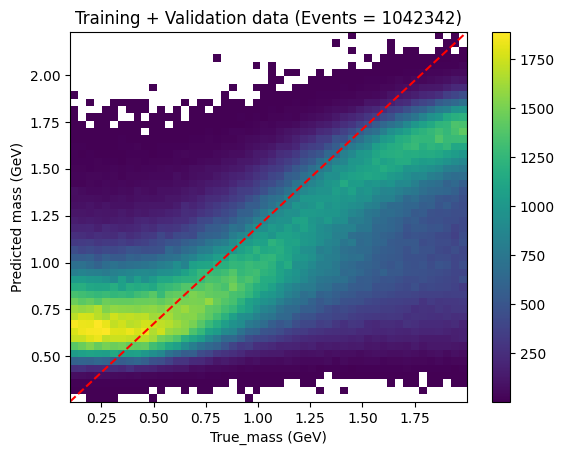

In [29]:
x = np.linspace (min(Data_true_list), max(Data_true_list), 100)
y = np.linspace (min(data_pred), max(data_pred), 100)

Data_true_array = np.array(Data_true_list)
Data_pred_array = np.array(data_pred)

num_Events = len(Data_true_list)

# Plot the heatmap
plt.hist2d(Data_true_array,Data_pred_array,bins= [50,50],cmin=1)
plt.colorbar()  # Show color scale
plt.plot(x,y, c='r', ls='--')
plt.title(f'Training + Validation data (Events = {num_Events})')
plt.xlabel('True_mass (GeV)')
plt.ylabel('Predicted mass (GeV)')
plt.show()


In [16]:
# Open the file and load its content
with open(file_path_vid, "rb") as file:  # "rb" mode is for reading in binary
    data_vid = pickle.load(file)

In [17]:
# Open the file and load its content
with open(file_path_tid, "rb") as file:  # "rb" mode is for reading in binary
    data_tid = pickle.load(file)

In [18]:
data_vid[0:10]

array([ 2,  5, 15, 26, 34, 36, 37, 40, 41, 42])

In [19]:
data_tid[0:10]

array([ 374886,  439570,  510061,  538829,  385083, 1016843,  335942,
        484920,  942316, 1032720])

In [20]:
data_vid_sort = np.sort(data_vid)

In [21]:
print(data_vid_sort)

[      2       5      15 ... 1042336 1042338 1042339]


In [22]:
data_tid_sort = np.sort (data_tid)

In [23]:
data_tid_sort

array([      0,       1,       3, ..., 1042337, 1042340, 1042341])

In [24]:
data_pred_arr = np.array(data_pred)
Data_true_arr = np.array(Data_true_list)

In [25]:
train_data_pred = data_pred_arr[data_tid_sort]
valid_data_pred = data_pred_arr[data_vid_sort]
train_data_true =Data_true_arr[data_tid_sort]
valid_data_true = Data_true_arr[data_vid_sort]

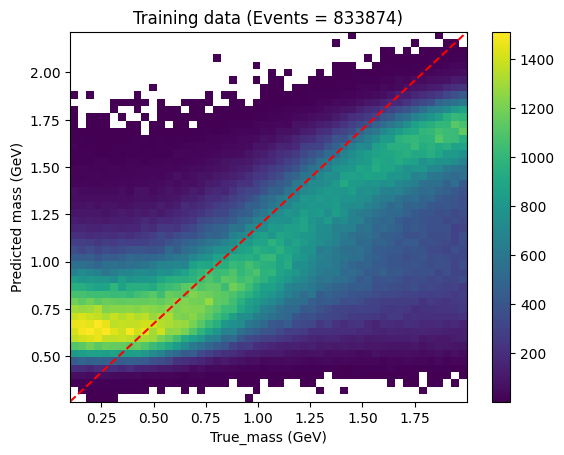

In [32]:
# Reshape into a 2D array (just for demonstration)
# data = np.array([data_pred, Data_true_list])

num_Events_train = len(train_data_true)

x = np.linspace (min(train_data_true), max(train_data_true), 100)
y = np.linspace (min(train_data_pred), max(train_data_pred), 100)

# Plot the heatmap
plt.hist2d(train_data_true,train_data_pred,bins= [50,50],cmin=1)
plt.colorbar()  # Show color scale
plt.plot(x,y, c='r', ls='--')
plt.title(f'Training data (Events = {num_Events_train})')
plt.xlabel('True_mass (GeV)')
plt.ylabel('Predicted mass (GeV)')
plt.show()

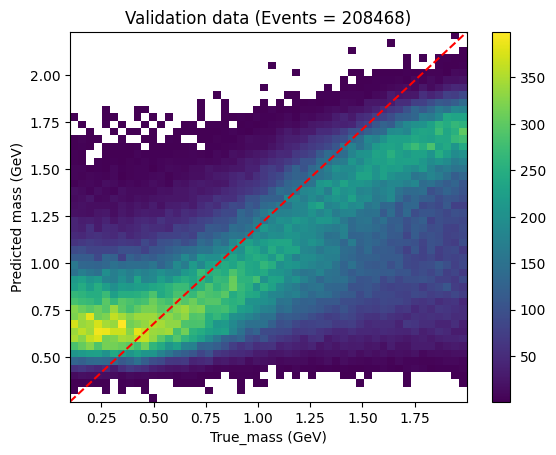

In [31]:
# Reshape into a 2D array (just for demonstration)
# data = np.array([data_pred, Data_true_list])

num_Events_valid = len(valid_data_true)

x = np.linspace (min(valid_data_true), max(valid_data_true), 100)
y = np.linspace (min(valid_data_pred), max(valid_data_pred), 100)

# Plot the heatmap
plt.hist2d(valid_data_true,valid_data_pred,bins= [50,50],cmin=1)
plt.colorbar()  # Show color scale
plt.plot(x,y, c='r', ls='--')
plt.title(f'Validation data (Events = {num_Events_valid})')
plt.xlabel('True_mass (GeV)')
plt.ylabel('Predicted mass (GeV)')
plt.show()